In [1]:
#pip install catboost

In [2]:
#pip install lightgbm

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb

In [2]:
# Load the dataset
dataset = pd.read_csv('Churning_data.csv')

In [3]:
dataset.dtypes

customer_id              int64
telecom_partner         object
gender                  object
age                      int64
state                   object
city                    object
pincode                  int64
date_of_registration    object
num_dependents           int64
estimated_salary         int64
calls_made               int64
sms_sent                 int64
data_used                int64
churn                    int64
dtype: object

In [4]:
# Display basic information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB
None


In [5]:
# Summary statistics
print(dataset.describe())

         customer_id            age        pincode  num_dependents  \
count  243553.000000  243553.000000  243553.000000   243553.000000   
mean   121777.000000      46.077609  549501.270541        1.997500   
std     70307.839393      16.444029  259808.860574        1.414941   
min         1.000000      18.000000  100006.000000        0.000000   
25%     60889.000000      32.000000  324586.000000        1.000000   
50%    121777.000000      46.000000  548112.000000        2.000000   
75%    182665.000000      60.000000  774994.000000        3.000000   
max    243553.000000      74.000000  999987.000000        4.000000   

       estimated_salary     calls_made       sms_sent      data_used  \
count     243553.000000  243553.000000  243553.000000  243553.000000   
mean       85021.137839      49.229695      24.086104    5009.523578   
std        37508.963233      29.085783      14.502418    2914.113681   
min        20000.000000       0.000000       0.000000       0.000000   
25%      

In [6]:
# Check for missing values
print(dataset.isnull().sum())

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64


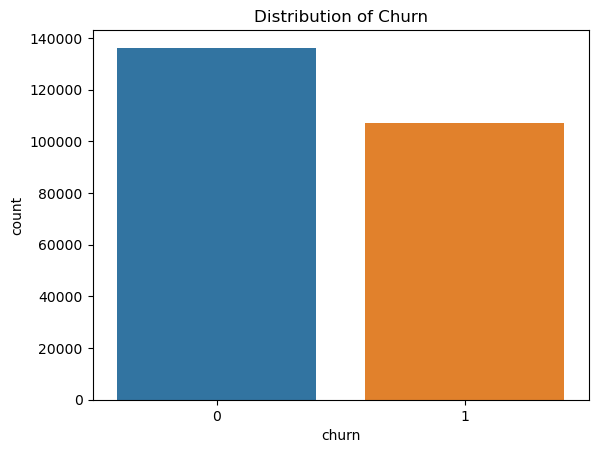

In [7]:
# Check the distribution of the target variable
sns.countplot(x='churn', data=dataset)
plt.title("Distribution of Churn")
plt.show()

In [8]:
sns.boxplot

<function seaborn.categorical.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)>

C:\Users\namra\AppData\Local\Temp\ipykernel_14324\3706089200.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


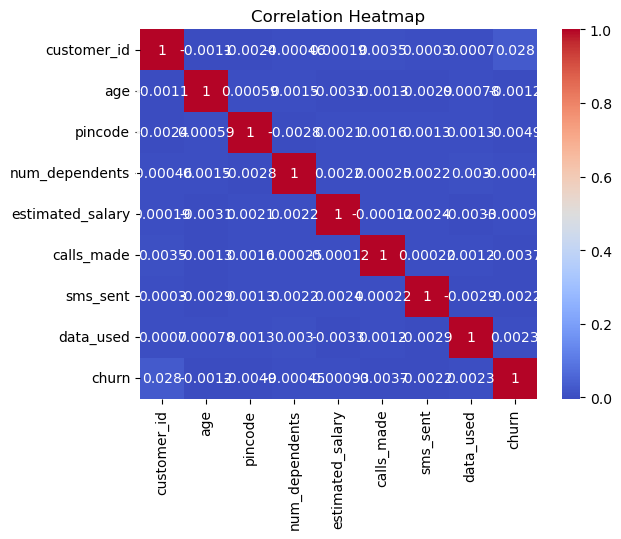

In [9]:
# Visualize the correlation between numerical features
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

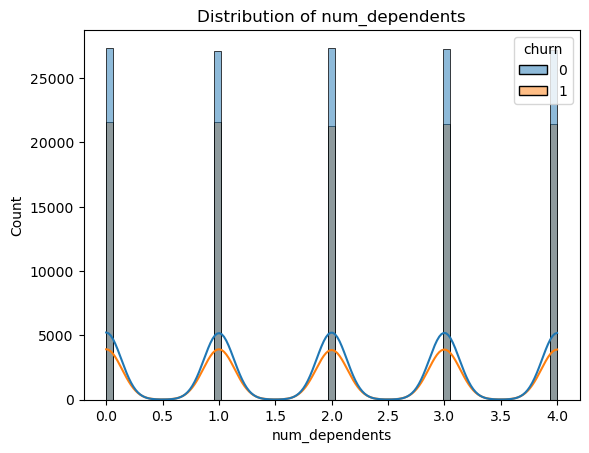

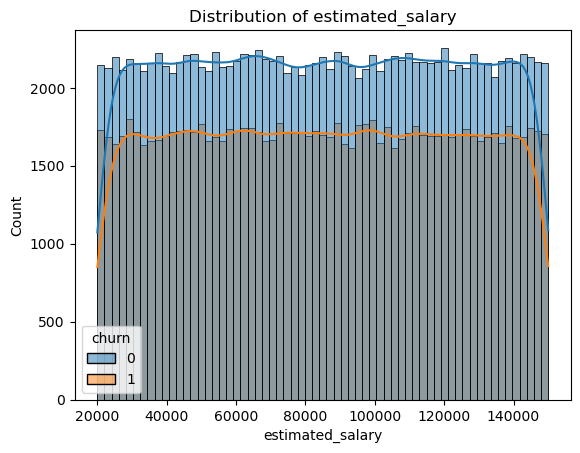

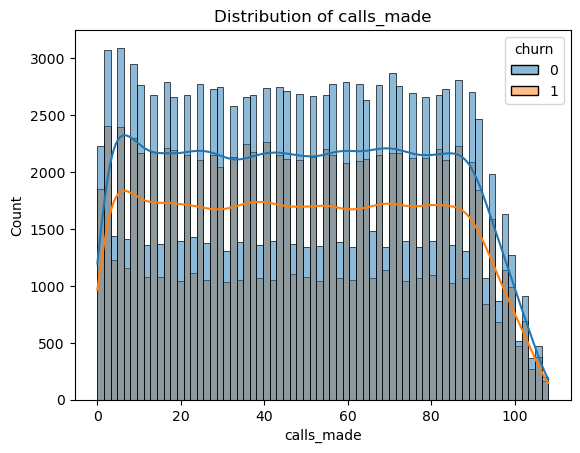

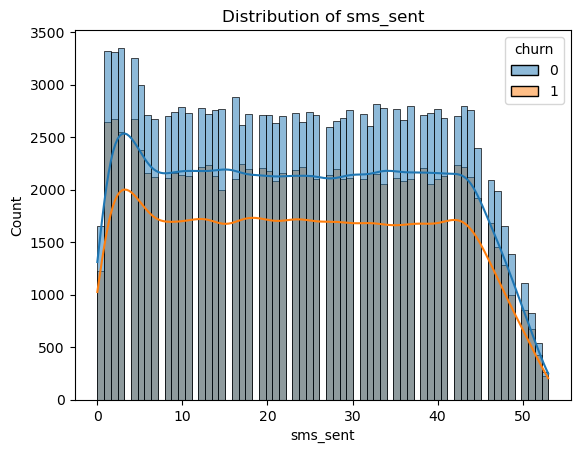

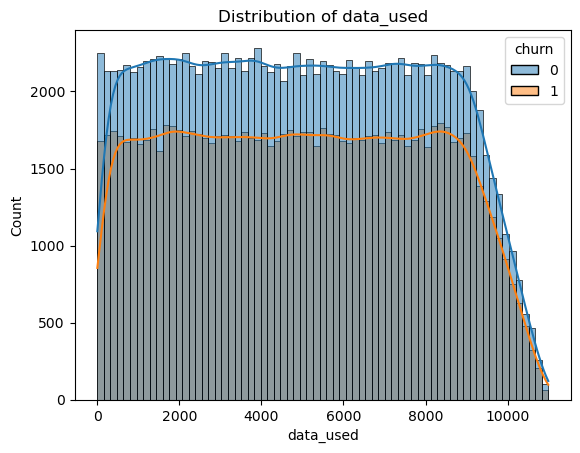

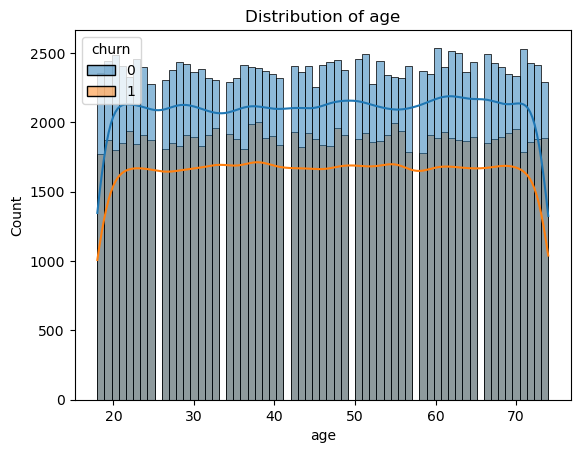

In [10]:
# Plot distribution of numerical features
numerical_features = ['num_dependents', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'age']
for feature in numerical_features:
    sns.histplot(data=dataset, x=feature, hue='churn', kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

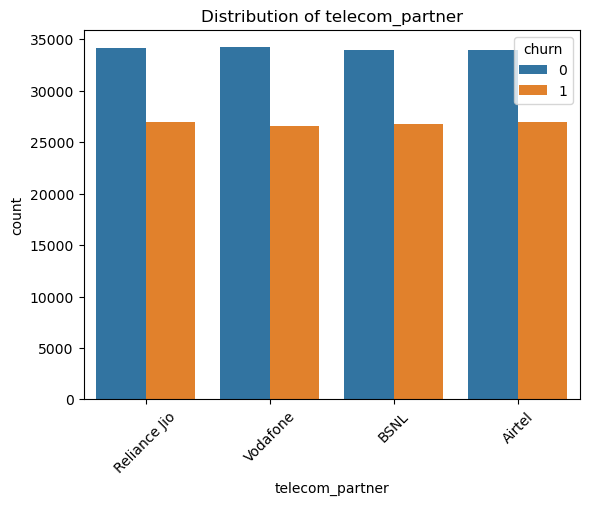

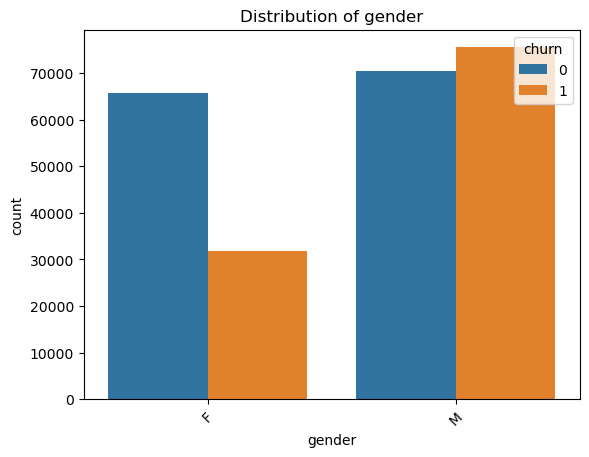

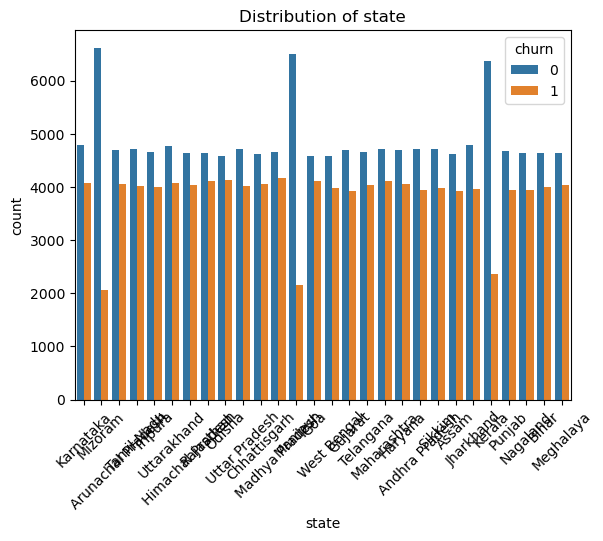

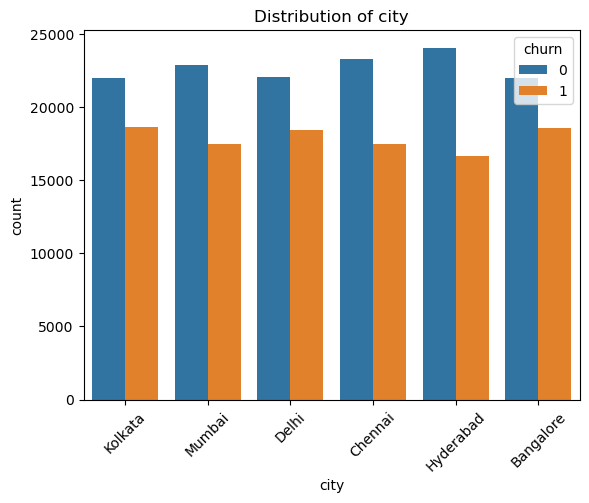

In [11]:
# Analyze categorical features
categorical_features = ['telecom_partner', 'gender', 'state', 'city']
for feature in categorical_features:
    sns.countplot(x=feature, data=dataset, hue='churn')
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)
    plt.show()

In [17]:
import pandas as pd

# Assuming you have a DataFrame named df
# Replace 'DateColumn' with the actual name of the column containing the date values

value_to_remove = '18-08-2021'
dataset = dataset[dataset['date_of_registration'] != value_to_remove]

# Now df does not contain rows with the value '18-08-2021'


In [18]:
# List of categorical columns
categorical_columns = ['telecom_partner', 'gender', 'state', 'city']

# Perform one-hot encoding
data_encoded = pd.get_dummies(dataset, columns=categorical_columns)

In [19]:
# Split the data into training and testing sets
X = data_encoded.drop('churn', axis=1)
y = data_encoded['churn'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [22]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_selection import SelectFromModel
# from sklearn.preprocessing import StandardScaler

# # Feature Selection
# sfm = SelectFromModel(DecisionTreeClassifier(), threshold="mean")
# sfm.fit(X_train, y_train)
# X_train_sfm = sfm.transform(X_train)
# X_test_sfm = sfm.transform(X_test)
# selected_feature_names = X_train.columns[sfm.get_support()]

# # Standard Scaling
# scaler = StandardScaler()

# # Drop the date column before scaling
# date_column = 'date_of_registration'
# X_train_without_date = X_train.drop(date_column, axis=1)
# X_test_without_date = X_test.drop(date_column, axis=1)

# # Fit the scaler on the training data and transform both training and test data
# X_train_scaled = scaler.fit_transform(X_train_without_date)
# X_test_scaled = scaler.transform(X_test_without_date)


In [21]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_selection import SelectFromModel
# sfm = SelectFromModel(DecisionTreeClassifier(), threshold="mean")
# sfm.fit(X_train,y_train)
# X_train_sfm = sfm.transform(X_train)
# X_test_sfm = sfm.transform(X_test)
# sfm.get_feature_names_out()

In [23]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Drop the date column before scaling
X_train_without_date = X_train.drop('date_of_registration', axis=1)
X_test_without_date = X_test.drop('date_of_registration', axis=1)

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train_without_date)
X_test_scaled = scaler.transform(X_test_without_date)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(DecisionTreeClassifier(), threshold="mean")
sfm.fit(X_train_scaled, y_train)

X_train_sfm = sfm.transform(X_train_scaled)
X_test_sfm = sfm.transform(X_test_scaled)

# Get the selected feature indices
selected_feature = sfm.get_support(indices=True)

# Get the original column names of the selected features
selected_feature_names = X_train.columns[selected_feature]

# Print the selected feature names
print(selected_feature_names)


Index(['customer_id', 'age', 'pincode', 'date_of_registration',
       'num_dependents', 'estimated_salary', 'calls_made', 'sms_sent',
       'telecom_partner_Vodafone'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import RFE

# Create an instance of the model you want to use for feature selection
# For example, let's use a RandomForestClassifier for this demonstration
model = RandomForestClassifier()

# Create an instance of RFE with the model and desired number of features to select
num_features_to_select = 6  # Adjust this as needed
rfe = RFE(model, n_features_to_select=num_features_to_select)

# Fit RFE on the training data
rfe.fit(X_train_scaled, y_train)

# Get the selected feature indices
selected_feature_indices = rfe.support_

# Get the selected feature names
selected_feature_names = X_train_without_date.columns[selected_feature_indices]

# Print the selected feature names
print("Selected features:")
for feature in selected_feature_names:
    print(feature)

In [16]:
# Apply Logistic Regression
print("Logistic Regression:")
log_reg = LogisticRegression(class_weight='balanced', C=0.001, penalty='l2', random_state=42)

log_reg.fit(X_train_scaled, y_train)
log_reg_y_pred = log_reg.predict(X_test_scaled)

log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
log_reg_f1 = f1_score(y_test, log_reg_y_pred)
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_y_pred)

log_reg_report = classification_report(y_test, log_reg_y_pred, target_names=['Not Churn', 'Churn'])

print("Accuracy:", log_reg_accuracy)
print("F1-Score:", log_reg_f1)
print("Confusion Matrix:\n", log_reg_conf_matrix)
print("Classification Report:\n", log_reg_report)
print("=" * 80)

Logistic Regression:
Accuracy: 0.8056701771673749
F1-Score: 0.8285517641092517
Confusion Matrix:
 [[16372  3027]
 [ 6439 22873]]
Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.72      0.84      0.78     19399
       Churn       0.88      0.78      0.83     29312

    accuracy                           0.81     48711
   macro avg       0.80      0.81      0.80     48711
weighted avg       0.82      0.81      0.81     48711



In [17]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
# Define hyperparameter grid for fine-tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'penalty': ['l1', 'l2'],          # Regularization type
    'class_weight': [None, 'balanced']  # Class weight
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Create GridSearchCV instance
grid_search = GridSearchCV(log_reg, param_grid, scoring='f1', cv=5, n_jobs=-1)

# Fit the GridSearchCV on training data
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_log_reg = grid_search.best_estimator_

# Predict using the best model
log_reg_y_pred = best_log_reg.predict(X_test_scaled)

# Calculate performance metrics
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
log_reg_f1 = f1_score(y_test, log_reg_y_pred)
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_y_pred)

log_reg_report = classification_report(y_test, log_reg_y_pred, target_names=['Not Churn', 'Churn'])

print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)
print("Accuracy:", log_reg_accuracy)
print("F1-Score:", log_reg_f1)
print("Confusion Matrix:\n", log_reg_conf_matrix)
print("Classification Report:\n", log_reg_report)
print("=" * 80)


F:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "F:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Anaconda\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)


Best Parameters: {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2'}
Best F1-Score: 0.5177544760362851
Accuracy: 0.8056701771673749
F1-Score: 0.8285517641092517
Confusion Matrix:
 [[16372  3027]
 [ 6439 22873]]
Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.72      0.84      0.78     19399
       Churn       0.88      0.78      0.83     29312

    accuracy                           0.81     48711
   macro avg       0.80      0.81      0.80     48711
weighted avg       0.82      0.81      0.81     48711



In [18]:
# Random Forest Classifier
print("Random Forest Classifier:")
rf_classifier = RandomForestClassifier(n_estimators=500, 
    max_depth=10, 
    min_samples_split=5, 
    min_samples_leaf=5, 
    max_features='sqrt',
    class_weight='balanced',                                  
    random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
rf_y_pred = rf_classifier.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

rf_f1 = f1_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred, target_names=['Not Churn', 'Churn'])
print("Accuracy:", rf_accuracy)
print("F1-Score:", rf_f1)
print("Confusion Matrix:\n", rf_conf_matrix)
print("Classification Report:\n", rf_report)
print("=" * 80)

Random Forest Classifier:
Accuracy: 0.9715669971874936
F1-Score: 0.9764082647725143
Confusion Matrix:
 [[18665   734]
 [  651 28661]]
Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.97      0.96      0.96     19399
       Churn       0.98      0.98      0.98     29312

    accuracy                           0.97     48711
   macro avg       0.97      0.97      0.97     48711
weighted avg       0.97      0.97      0.97     48711



In [19]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# # Define hyperparameter grid for fine-tuning
# param_grid = {
#     'n_estimators': [100, 200, 300, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 5, 10],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'class_weight': [None, 'balanced']
# }

# # Initialize the Random Forest Classifier model
# rf_classifier = RandomForestClassifier(random_state=42)

# # Create GridSearchCV instance
# grid_search = GridSearchCV(rf_classifier, param_grid, scoring='f1', cv=5, n_jobs=-1)

# # Fit the GridSearchCV on training data
# grid_search.fit(X_train_scaled, y_train)

# # Get the best estimator
# best_rf_classifier = grid_search.best_estimator_

# # Predict using the best model
# rf_y_pred = best_rf_classifier.predict(X_test_scaled)

# # Calculate performance metrics
# rf_accuracy = accuracy_score(y_test, rf_y_pred)
# rf_f1 = f1_score(y_test, rf_y_pred)
# rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
# rf_report = classification_report(y_test, rf_y_pred, target_names=['Not Churn', 'Churn'])

# print("Best Parameters:", grid_search.best_params_)
# print("Best F1-Score:", grid_search.best_score_)
# print("Accuracy:", rf_accuracy)
# print("F1-Score:", rf_f1)
# print("Confusion Matrix:\n", rf_conf_matrix)
# print("Classification Report:\n", rf_report)
# print("=" * 80)


In [20]:
# Apply Gradient Boosting
print("Gradient Boosting:")

# Create an instance of GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model
gradient_boosting.fit(X_train_scaled, y_train)

# Predict using the model
gradient_boosting_y_pred = gradient_boosting.predict(X_test_scaled)

# Calculate metrics
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_y_pred)
gradient_boosting_f1 = f1_score(y_test, gradient_boosting_y_pred)
gradient_boosting_conf_matrix = confusion_matrix(y_test, gradient_boosting_y_pred)
gradient_boosting_report = classification_report(y_test, gradient_boosting_y_pred, target_names=['Not Churn', 'Churn'])

# Print metrics
print("Accuracy:", gradient_boosting_accuracy)
print("F1-Score:", gradient_boosting_f1)
print("Confusion Matrix:\n", gradient_boosting_conf_matrix)
print("Classification Report:\n", gradient_boosting_report)
print("=" * 80)

Gradient Boosting:
Accuracy: 0.6429553899529881
F1-Score: 0.5801062288749396
Confusion Matrix:
 [[19305    94]
 [17298 12014]]
Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.53      1.00      0.69     19399
       Churn       0.99      0.41      0.58     29312

    accuracy                           0.64     48711
   macro avg       0.76      0.70      0.63     48711
weighted avg       0.81      0.64      0.62     48711



In [21]:
# Apply XGBoost Classifier
print("XGBoost Classifier:")
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,  
    max_depth=6,  
    learning_rate=0.1,  
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=42
)
xgb_classifier.fit(X_train_scaled, y_train)
xgb_y_pred = xgb_classifier.predict(X_test_scaled)

xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)
xgb_report = classification_report(y_test, xgb_y_pred, target_names=['Not Churn', 'Churn'])

print("Accuracy:", xgb_accuracy)
print("F1-Score:", xgb_f1)
print("Confusion Matrix:\n", xgb_conf_matrix)
print("Classification Report:\n", xgb_report)
print("=" * 80)


XGBoost Classifier:
Accuracy: 0.677362402742707
F1-Score: 0.6564508372316706
Confusion Matrix:
 [[17980  1419]
 [14297 15015]]
Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.56      0.93      0.70     19399
       Churn       0.91      0.51      0.66     29312

    accuracy                           0.68     48711
   macro avg       0.74      0.72      0.68     48711
weighted avg       0.77      0.68      0.67     48711



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Define hyperparameter grid for fine-tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Create GridSearchCV instance
grid_search = GridSearchCV(xgb_classifier, param_grid, scoring='f1', cv=5, n_jobs=-1)

# Fit the GridSearchCV on training data
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_xgb_classifier = grid_search.best_estimator_

# Predict using the best model
xgb_y_pred = best_xgb_classifier.predict(X_test_scaled)

# Calculate performance metrics
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)
xgb_report = classification_report(y_test, xgb_y_pred, target_names=['Not Churn', 'Churn'])

print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)
print("Accuracy:", xgb_accuracy)
print("F1-Score:", xgb_f1)
print("Confusion Matrix:\n", xgb_conf_matrix)
print("Classification Report:\n", xgb_report)
print("=" * 80)


In [ ]:
# Create and train the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(
    boosting_type='gbdt', 
    num_leaves=31, 
    max_depth=-1, 
    learning_rate=0.05, 
    n_estimators=100, 
    class_weight='balanced', 
    random_state=42
)
lgb_classifier.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
lgb_y_pred = lgb_classifier.predict(X_test_scaled)
lgb_accuracy = accuracy_score(y_test, lgb_y_pred)
lgb_f1 = f1_score(y_test, lgb_y_pred)
lgb_conf_matrix = confusion_matrix(y_test, lgb_y_pred)
lgb_report = classification_report(y_test, lgb_y_pred, target_names=['Not Churn', 'Churn'])

print("LightGBM Classifier:")
print("Accuracy:", lgb_accuracy)
print("F1-Score:", lgb_f1)
print("Confusion Matrix:\n", lgb_conf_matrix)
print("Classification Report:\n", lgb_report)
print("=" * 80)

In [28]:
# Apply CatBoost Classifier
print("CatBoost Classifier:")
catboost_classifier = CatBoostClassifier(iterations=500, 
                                         depth=6, 
                                         learning_rate=0.1, 
                                         loss_function='Logloss', 
                                         verbose=100, 
                                         random_seed=42)

catboost_classifier.fit(X_train_scaled, y_train)
catboost_y_pred = catboost_classifier.predict(X_test_scaled)

catboost_accuracy = accuracy_score(y_test, catboost_y_pred)
catboost_f1 = f1_score(y_test, catboost_y_pred)
catboost_conf_matrix = confusion_matrix(y_test, catboost_y_pred)
catboost_report = classification_report(y_test, catboost_y_pred, target_names=['Not Churn', 'Churn'])

print("Accuracy:", catboost_accuracy)
print("F1-Score:", catboost_f1)
print("Confusion Matrix:\n", catboost_conf_matrix)
print("Classification Report:\n", catboost_report)
print("=" * 80)


CatBoost Classifier:
0:	learn: 0.6689068	total: 342ms	remaining: 2m 50s
100:	learn: 0.5645447	total: 3.18s	remaining: 12.6s
200:	learn: 0.5569316	total: 5.87s	remaining: 8.73s
300:	learn: 0.5523063	total: 8.41s	remaining: 5.56s
400:	learn: 0.5482339	total: 11.3s	remaining: 2.78s
499:	learn: 0.5441937	total: 14.1s	remaining: 0us
Accuracy: 0.7089231780731853
F1-Score: 0.7164842202165344
Confusion Matrix:
 [[16603  6915]
 [ 7252 17901]]
Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.70      0.71      0.70     23518
       Churn       0.72      0.71      0.72     25153

    accuracy                           0.71     48671
   macro avg       0.71      0.71      0.71     48671
weighted avg       0.71      0.71      0.71     48671



In [ ]:
from catboost import CatBoostClassifier, Pool

# Define hyperparameter grid for fine-tuning
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5],
}

# Initialize the CatBoostClassifier
catboost_classifier = CatBoostClassifier(iterations=1000, loss_function='Logloss', verbose=100, random_seed=42)

# Create a Pool object for training
train_pool = Pool(X_train_scaled, y_train)

# Initialize CatBoost's GridSearch
grid_search = catboost_classifier.grid_search(param_grid, train_pool, cv=5, refit=True, partition_random_seed=42)

# Get the best estimator
best_catboost_classifier = grid_search['params']

# Predict using the best model
catboost_y_pred = best_catboost_classifier.predict(X_test_scaled)

# Calculate performance metrics
catboost_accuracy = accuracy_score(y_test, catboost_y_pred)
catboost_f1 = f1_score(y_test, catboost_y_pred)
catboost_conf_matrix = confusion_matrix(y_test, catboost_y_pred)
catboost_report = classification_report(y_test, catboost_y_pred, target_names=['Not Churn', 'Churn'])

print("Best Parameters:", best_catboost_classifier)
print("Accuracy:", catboost_accuracy)
print("F1-Score:", catboost_f1)
print("Confusion Matrix:\n", catboost_conf_matrix)
print("Classification Report:\n", catboost_report)
print("=" * 80)
